In [3]:
# computational import
import numpy as np
import xarray as xr

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [4]:
# open density datasets
ds = {}
ds15 = {}
list11 = np.linspace(1,11,11)
for i in list11:
    ds[int(i)] = xr.open_dataset('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'.nc')
    ds15[int(i)] = xr.open_dataset('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'_15m.nc')

In [5]:
# designate bins
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

In [6]:
# calculate average density
for i in list11:
    if i == 1:
        den = ds[int(i)]['den']
        den15 = ds15[int(i)]['den']
# add steps together
    else:
        den = den + ds[int(i)]['den']
        den15 = den15 + ds15[int(i)]['den']
den = den/11
den15 = den15/11

In [7]:
# Create a colormap
cmap = plt.get_cmap('Spectral_r')

# Modify the colormap to set 0 to white
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1, 1, 1, 1.0)  # Set the first color in the colormap to white
cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

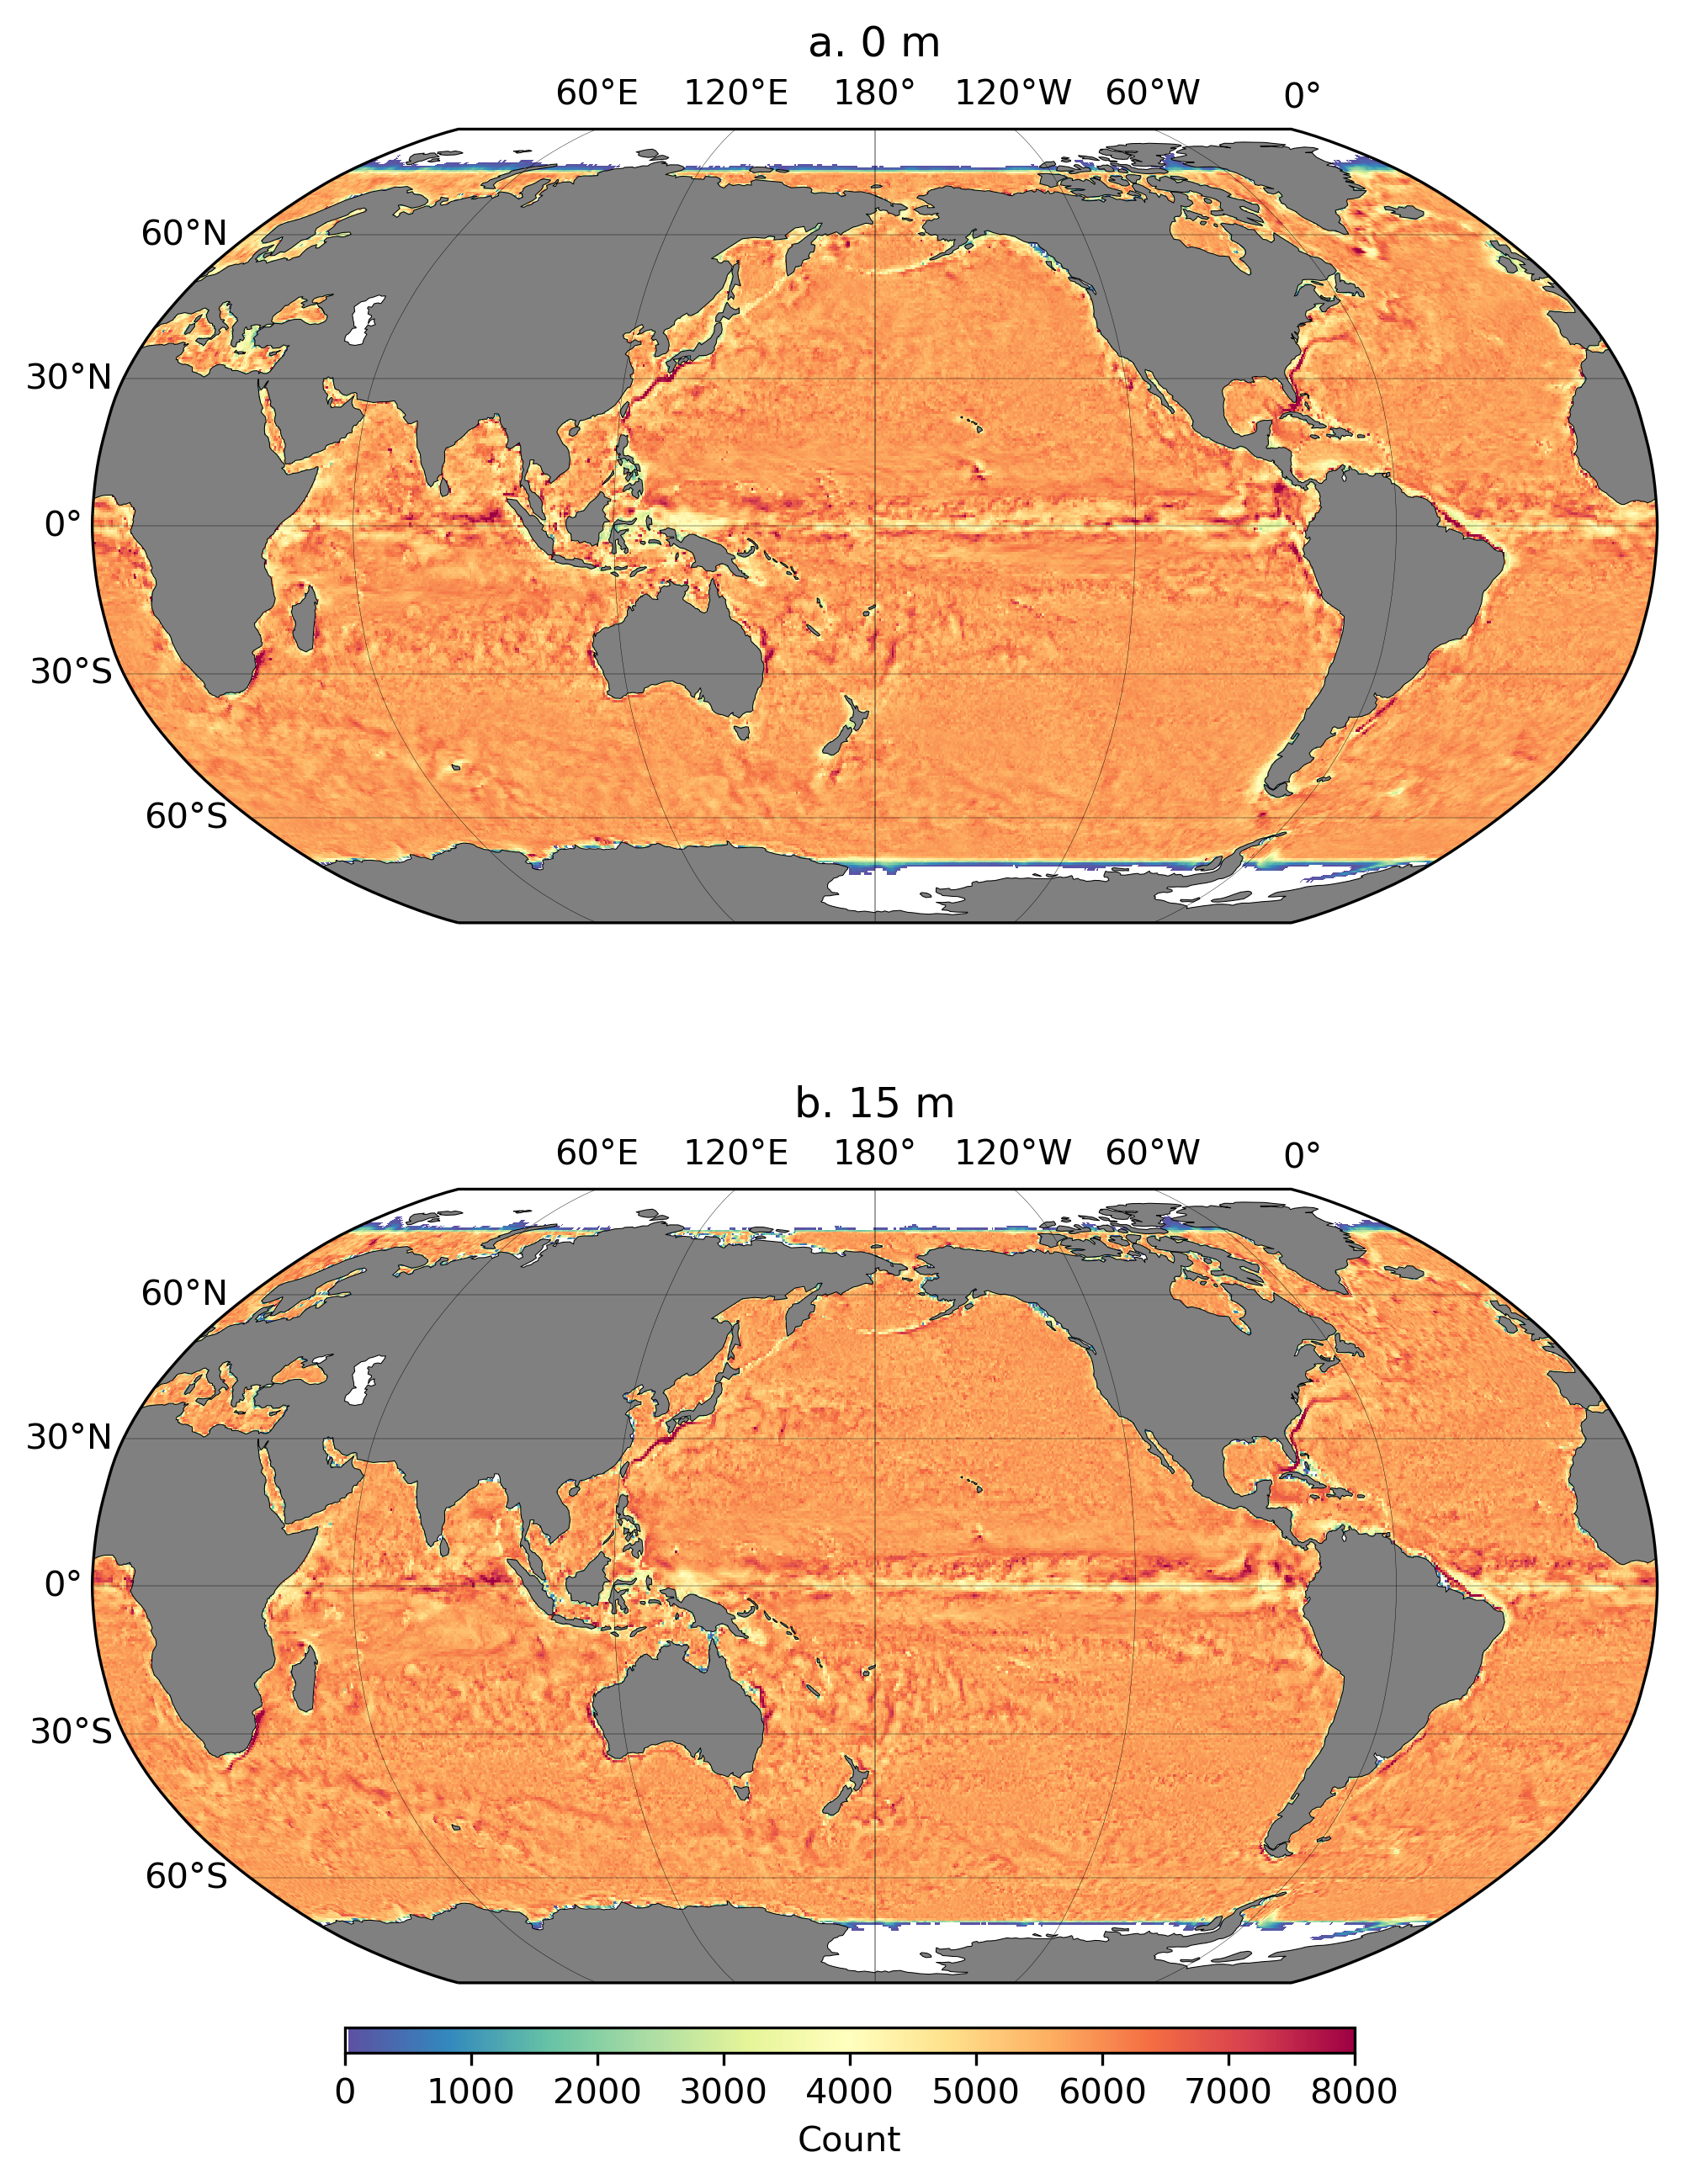

In [34]:
# create figure and image
fig = plt.figure(figsize = (8,10), dpi = 300)
ax1 = fig.add_subplot(2,1,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                den.transpose(),
                cmap=cmap, 
                transform=ccrs.PlateCarree(),
                vmin=0, vmax=8000) 

# # gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add coastlines and land features
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax1.set_title('a. 0 m')

ax2 = fig.add_subplot(2,1,2,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                den15.transpose(),
                cmap=cmap, 
                transform=ccrs.PlateCarree(),
                vmin=0, vmax=8000) 

# # gridlines and labels
gl = ax2.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add coastlines and land features
ax2.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax2.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax2.set_title('b. 15 m')

cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.01]) # left, bottom, width, height
cb = fig.colorbar(image, cax=cbar_ax, orientation = "horizontal", ticks = np.linspace(0, 8000, 9), label = 'Count')

In [18]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter



RuntimeError: Cannot handle non-rectangular coordinate systems.

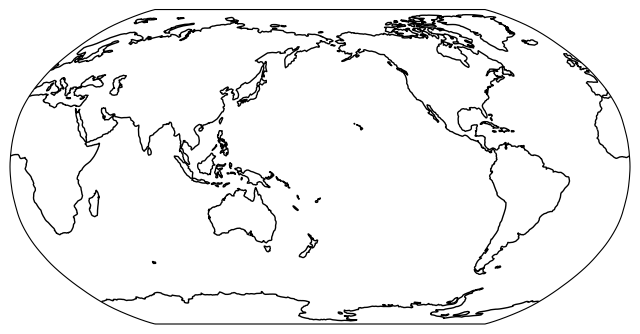

In [24]:

def main():
    fig = plt.figure(figsize=(8, 10))

    # Label axes of a Plate Carree projection with a central longitude of 180:
    ax1 = fig.add_subplot(2, 1, 1,
                          projection=ccrs.Robinson(central_longitude=180))
    ax1.set_global()
    ax1.coastlines()
    ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.Robinson())
    ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.Robinson())
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    # Label axes of a Mercator projection without degree symbols in the labels
    # and formatting labels to include 1 decimal place:
    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Mercator())
    ax2.set_global()
    ax2.coastlines()
    ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax2.set_yticks([-78.5, -60, -25.5, 25.5, 60, 80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)

    #plt.show()
if __name__ == '__main__':
    main()